In [1]:

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import chardet

In [2]:
#train = pd.read_csv(os.path.join(settings.PROCESSED_DIR, "train.csv"))
data_dir = './data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'

In [3]:
with open('data/Animated_Tv_Series.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('data/Animated_Tv_Series.csv', encoding=result['encoding'])
df.head()
df.shape

(1816, 10)

In [4]:
# df.iloc[1813]
df.dtypes

Id                    int64
Title                object
Episodes            float64
Year                 object
Original channel     object
American company     object
Note                 object
Technique            object
IMDb                float64
Google users         object
dtype: object

In [5]:
df[df.isnull().any(axis=1)]

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
5,6,The 7D,44.0,2014-2016,Disney XD,Disney Television Animation,NaN,Traditional,5.7,85%
...,...,...,...,...,...,...,...,...,...,...
1809,1810,The Zeta Project,26.0,2001-2002,Kids' WB,Warner Bros. Animation,NaN,Traditional,7.0,93%
1810,1811,Zevo-3,26.0,2010-2011,Nicktoons,MoonScoop Entertainment,NaN,Traditional,5.8,93%
1813,1814,Zombie College,12.0,2000-2001,NaN,icebox.com,NaN,Flash,6.8,62%
1814,1815,Zootopia+,6.0,2022,Disney+,Walt Disney Animation Studios,NaN,CGI,6.8,74%


In [6]:
#Preprocessing/Cleaning
techn = df['Technique'].unique()
arr_ = list(map(lambda x: len(x), techn)) 
x = techn[np.argsort(arr_)]
print(x)

['CGI' 'Flash' 'CGI/Flash' 'Traditional' 'Stop-Motion' 'Stop-motion'
 'CGI/Live-action' 'Traditional/CGI' 'CGI/Live-Action' 'Flash/Live-action'
 'Traditional/Flash' 'Flash/Live action' 'Flash/Live-Action'
 'Flash/Traditional' 'Live-Action/Flash' 'Flash/Traditional/CGI'
 'CGI/Flash/Live-action' 'CGI/Traditional/Flash' 'Stop-Motion/CGI/Flash'
 'Stop-Motion/Live-Action' 'Live-Action/Traditional'
 'Traditional/Live-action' 'Stop-motion/Live-action'
 'Traditional/Live-Action' 'Traditional/CGI/Stop-Motion'
 'Flash/Traditional/Live-Action' 'Flash/Live-Action/Traditional/CGI'
 'CGI/Stop-Motion/Flash/Traditional' 'Traditional/Stop-Motion/CGI/Flash'
 'Traditional/Live-Action/Flash/CGI' 'CGI/Flash/Stop-motion/Traditional'
 'Traditional/Flash/CGI/Stop-Motion' 'CGI/Flash/Stop-Motion/Live-Action'
 'Traditional (season 1)/Flash (season 2)'
 'Traditional/CGI/Stop-Motion/Live-Action'
 'Traditional (season 1)/Flash (season 2-3)'
 'Traditional (seasons 1-9)/Flash (season 10)'
 'CGI/Flash/Stop-Motion/Trad

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
one_hot_cols_technique = ["CGI","Flash","Traditional","Stop","Live","Digital"]

for col in one_hot_cols_technique:
    df[f"{col}"] = np.where(df['Technique'].str.contains(f"{col}"),1,0)
   

In [9]:
# df = df.drop(['StopMotion', 'LiveAction'], axis=1)

In [10]:
df['startEnd'] = df['Year'].str.split("-|,")

In [11]:
df.iloc[np.where(df['Year'].str.contains(","))]

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users,CGI,Flash,Traditional,Stop,Live,Digital,startEnd
260,261,Calvin and the Colonel,26.0,"1961-1962, 1964-1965",ABC,Kayro Productions,NaN,Traditional,6.6,88%,0,0,1,0,0,0,"[1961, 1962, 1964, 1965]"
278,279,Cartoon Planet,146.0,"1995-1998, 2012-2014",TBSCartoon Network,NaN,NaN,Traditional (season 1)/Flash (season 2-3),8.5,86%,0,1,1,0,0,0,"[1995, 1998, 2012, 2014]"
355,356,Celebrity Deathmatch,93.0,"1998-2002, 2006-2007","MTV, MTV2",Fogelmania ProductionsMTV Animation,Canadian co-production,Stop-Motion,6.9,95%,0,0,0,1,0,0,"[1998, 2002, 2006, 2007]"
366,367,Clone High,23.0,"2002-2003, 2023-present",MTVMax,MTV AnimationShadowMachine,Canadian co-production (season 1 only),Traditional (season 1)/Flash (season 2),6.4,91%,0,1,1,0,0,0,"[2002, 2003, 2023, present]"
627,628,"God, the Devil and Bob",13.0,"2000, 2011",NBCAdult Swim,Carsey-Werner Productions,NaN,Traditional,7.5,82%,0,0,1,0,0,0,"[2000, 2011]"
791,792,The Jetsons,75.0,"1962-1963, 1985-1987",ABCSyndication,Hanna-Barbera,NaN,Traditional,7.0,92%,0,0,1,0,0,0,"[1962, 1963, 1985, 1987]"
995,996,Minnie's Bow-Toons,89.0,"2011-2016, 2021-present",Disney Junior,Disney Television Animation,NaN,CGI,5.6,79%,1,0,0,0,0,0,"[2011, 2016, 2021, present]"
1174,1175,Perfect Hair Forever,9.0,"2004-2007, 2014",Adult Swim,Williams Street,NaN,Traditional,6.7,56%,0,0,1,0,0,0,"[2004, 2007, 2014]"
1754,1755,Winky Dink and You,65.0,"1953-1957, 1969-1973",CBSBroadcast syndication,Universal Television,NaN,Traditional,6.8,89%,0,0,1,0,0,0,"[1953, 1957, 1969, 1973]"


In [12]:
df["initRuntime"] = [1 if len(startend) == 1 else int(startend[1]) - int(startend[0]) if not "present" in startend[1] else -1 for startend in df['startEnd']]


In [13]:
df.iloc[np.where(df["initRuntime"] >= 5)]

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users,CGI,Flash,Traditional,Stop,Live,Digital,startEnd,initRuntime
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%,1,0,0,0,0,0,"[2000, 2008]",8
6,7,12 oz. Mouse,31.0,2005-2020,Adult Swim,Williams Street,NaN,Flash,6.5,72%,0,1,0,0,0,0,"[2005, 2020]",15
21,22,Adventure Time,283.0,2010-2018,Cartoon Network,Frederator StudiosCartoon Network Studios,NaN,Traditional,8.6,95%,0,0,1,0,0,0,"[2010, 2018]",8
39,40,The Adventures of Rocky and Bullwinkle and Fri...,163.0,1959-1964,ABCNBC,Jay Ward Productions,NaN,Traditional,7.8,92%,0,0,1,0,0,0,"[1959, 1964]",5
43,44,Adventures of the Gummi Bears,65.0,1985-1991,NBC,Walt Disney Television Animation,NaN,Traditional,7.5,90%,0,0,1,0,0,0,"[1985, 1991]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1773,WordGirl,130.0,2007-2015,PBS Kids Go! (2007-13)\r\nPBS Kids (2013-15),Soup2NutsScholastic Entertainment,NaN,Flash,7.1,85%,0,1,0,0,0,0,"[2007, 2015]",8
1774,1775,Word Party,60.0,2016-2021,Netflix,The Jim Henson Company,NaN,CGI,5.6,69%,1,0,0,0,0,0,"[2016, 2021]",5
1783,1784,X-Men: The Animated Series,76.0,1992-1997,Fox Kids Network,Marvel Entertainment Group,Canadian co-production,Traditional,8.4,88%,0,0,1,0,0,0,"[1992, 1997]",5
1794,1795,Yo Gabba Gabba!,66.0,2007-2015,Nickelodeon,Wildbrain Entertainment,Canadian co-production,Flash/Live-action,6.9,84%,0,1,0,0,1,0,"[2007, 2015]",8


In [14]:
df["Google users"] = df['Google users'].str.rstrip('%').astype('float') / 100.0

In [43]:
features = ['Episodes', 'Google users', 'CGI','Flash','Traditional','Stop','Live','Digital','initRuntime','IMDb']
cleaned_df = df[~df[features].isnull().any(axis=1)]
cleaned_df = cleaned_df.iloc[np.where(cleaned_df['initRuntime'] != -1)]

In [44]:
from sklearn.model_selection import train_test_split
X_features = ['Episodes', 'Google users', 'CGI','Flash','Traditional','Stop','Live','Digital','initRuntime']
X = cleaned_df[X_features]
y = cleaned_df['IMDb']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
cleaned_df[cleaned_df[features].isnull().any(axis=1)]


,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users,CGI,Flash,Traditional,Stop,Live,Digital,startEnd,initRuntime


In [46]:
y.isnull().any()

False

In [55]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
rf = forest.fit(X_train, y_train)

yfit = forest.predict(X_test)
#MSE
sum(y_test - yfit)/len(y_test)

# plt.plot(X_test['Episodes'], yfit, '-r')


0.07376826128030074

Elapsed time to compute the importances: 0.015 seconds


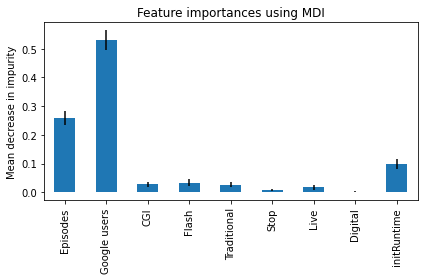

In [59]:
import pandas as pd
import time

import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=X_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#histogram gradient boosting